<a href="https://colab.research.google.com/github/moukouel/Notebooks/blob/main/AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Air Bnb Project Template
We are to predict prices in New York City

In [2]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print(tf.__version__)


2.18.0


Load data and take a look at it

In [4]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('./AB_NYC_2019.csv').sample(frac=1)    # Shuffle the data
data = data.dropna()    # Remove rows with missing values

# Display the first few rows of the dataframe
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30175,23285672,Quarto Bronx (NY),136455880,Alvina Da Silva,Bronx,Fordham,40.86918,-73.89050,Private room,34,1,2,2018-04-05,0.12,2,5
21727,17463985,Luxury Brooklyn Brownstone with Private Backyard,1377444,Kelly,Brooklyn,Bedford-Stuyvesant,40.68409,-73.94154,Entire home/apt,245,3,33,2019-06-24,1.19,1,60
27681,21741106,(moving out) ENTIRE place READ BEFORE YOU BOOK,64609445,Ina,Brooklyn,Clinton Hill,40.69479,-73.96812,Entire home/apt,43,3,7,2018-08-08,0.38,2,0
40270,31225706,Sugar Hill Retreat (SPECIAL OPENING PRICE!),233559664,Mordechai,Manhattan,Harlem,40.82294,-73.94453,Entire home/apt,150,3,15,2019-06-18,2.90,1,7
38657,30376805,Penthouse Apartment to view July 4th Fireworks,11773839,Nate,Manhattan,Chinatown,40.71446,-73.99112,Private room,95,2,5,2019-07-07,0.80,1,2


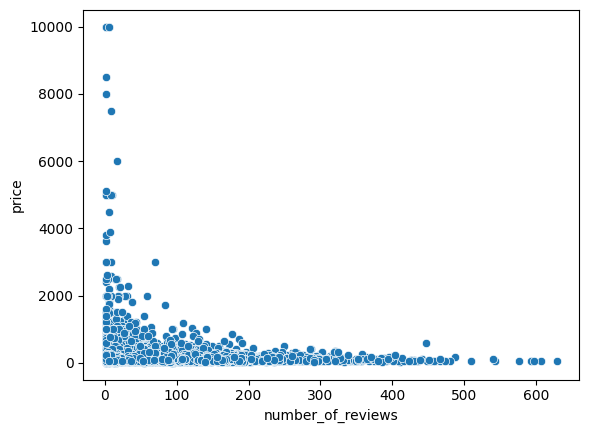

In [5]:
# prompt: Using dataframe data: seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of price vs. number of reviews
sns.scatterplot(x='number_of_reviews', y='price', data=data)
plt.show()


Data preprocessing - Convert to numeric values some important feature

In [6]:
# Select specific columns for analysis
features = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
print(features.isna().sum())

features['reviews_per_month'] = features['reviews_per_month'].fillna(0)
print(features.isna().sum())
onehot_neighborhood_group = pd.get_dummies(features['neighbourhood_group']).astype(int)
onehot_room_type = pd.get_dummies(features['room_type']).astype(int)
features = pd.concat([features, onehot_neighborhood_group, onehot_room_type], axis=1)
features = features.drop(columns=['neighbourhood_group', 'room_type'])
targets = data['price']

train_size = int(0.7 * len(data))
X_train = features.values[:train_size, :]
X_test = features.values[train_size:, :]
y_train = targets.values[:train_size]
y_test = targets.values[train_size:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

neighbourhood_group               0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
neighbourhood_group               0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
(27174, 13) (11647, 13) (27174,) (11647,)


Data visualization and analysis

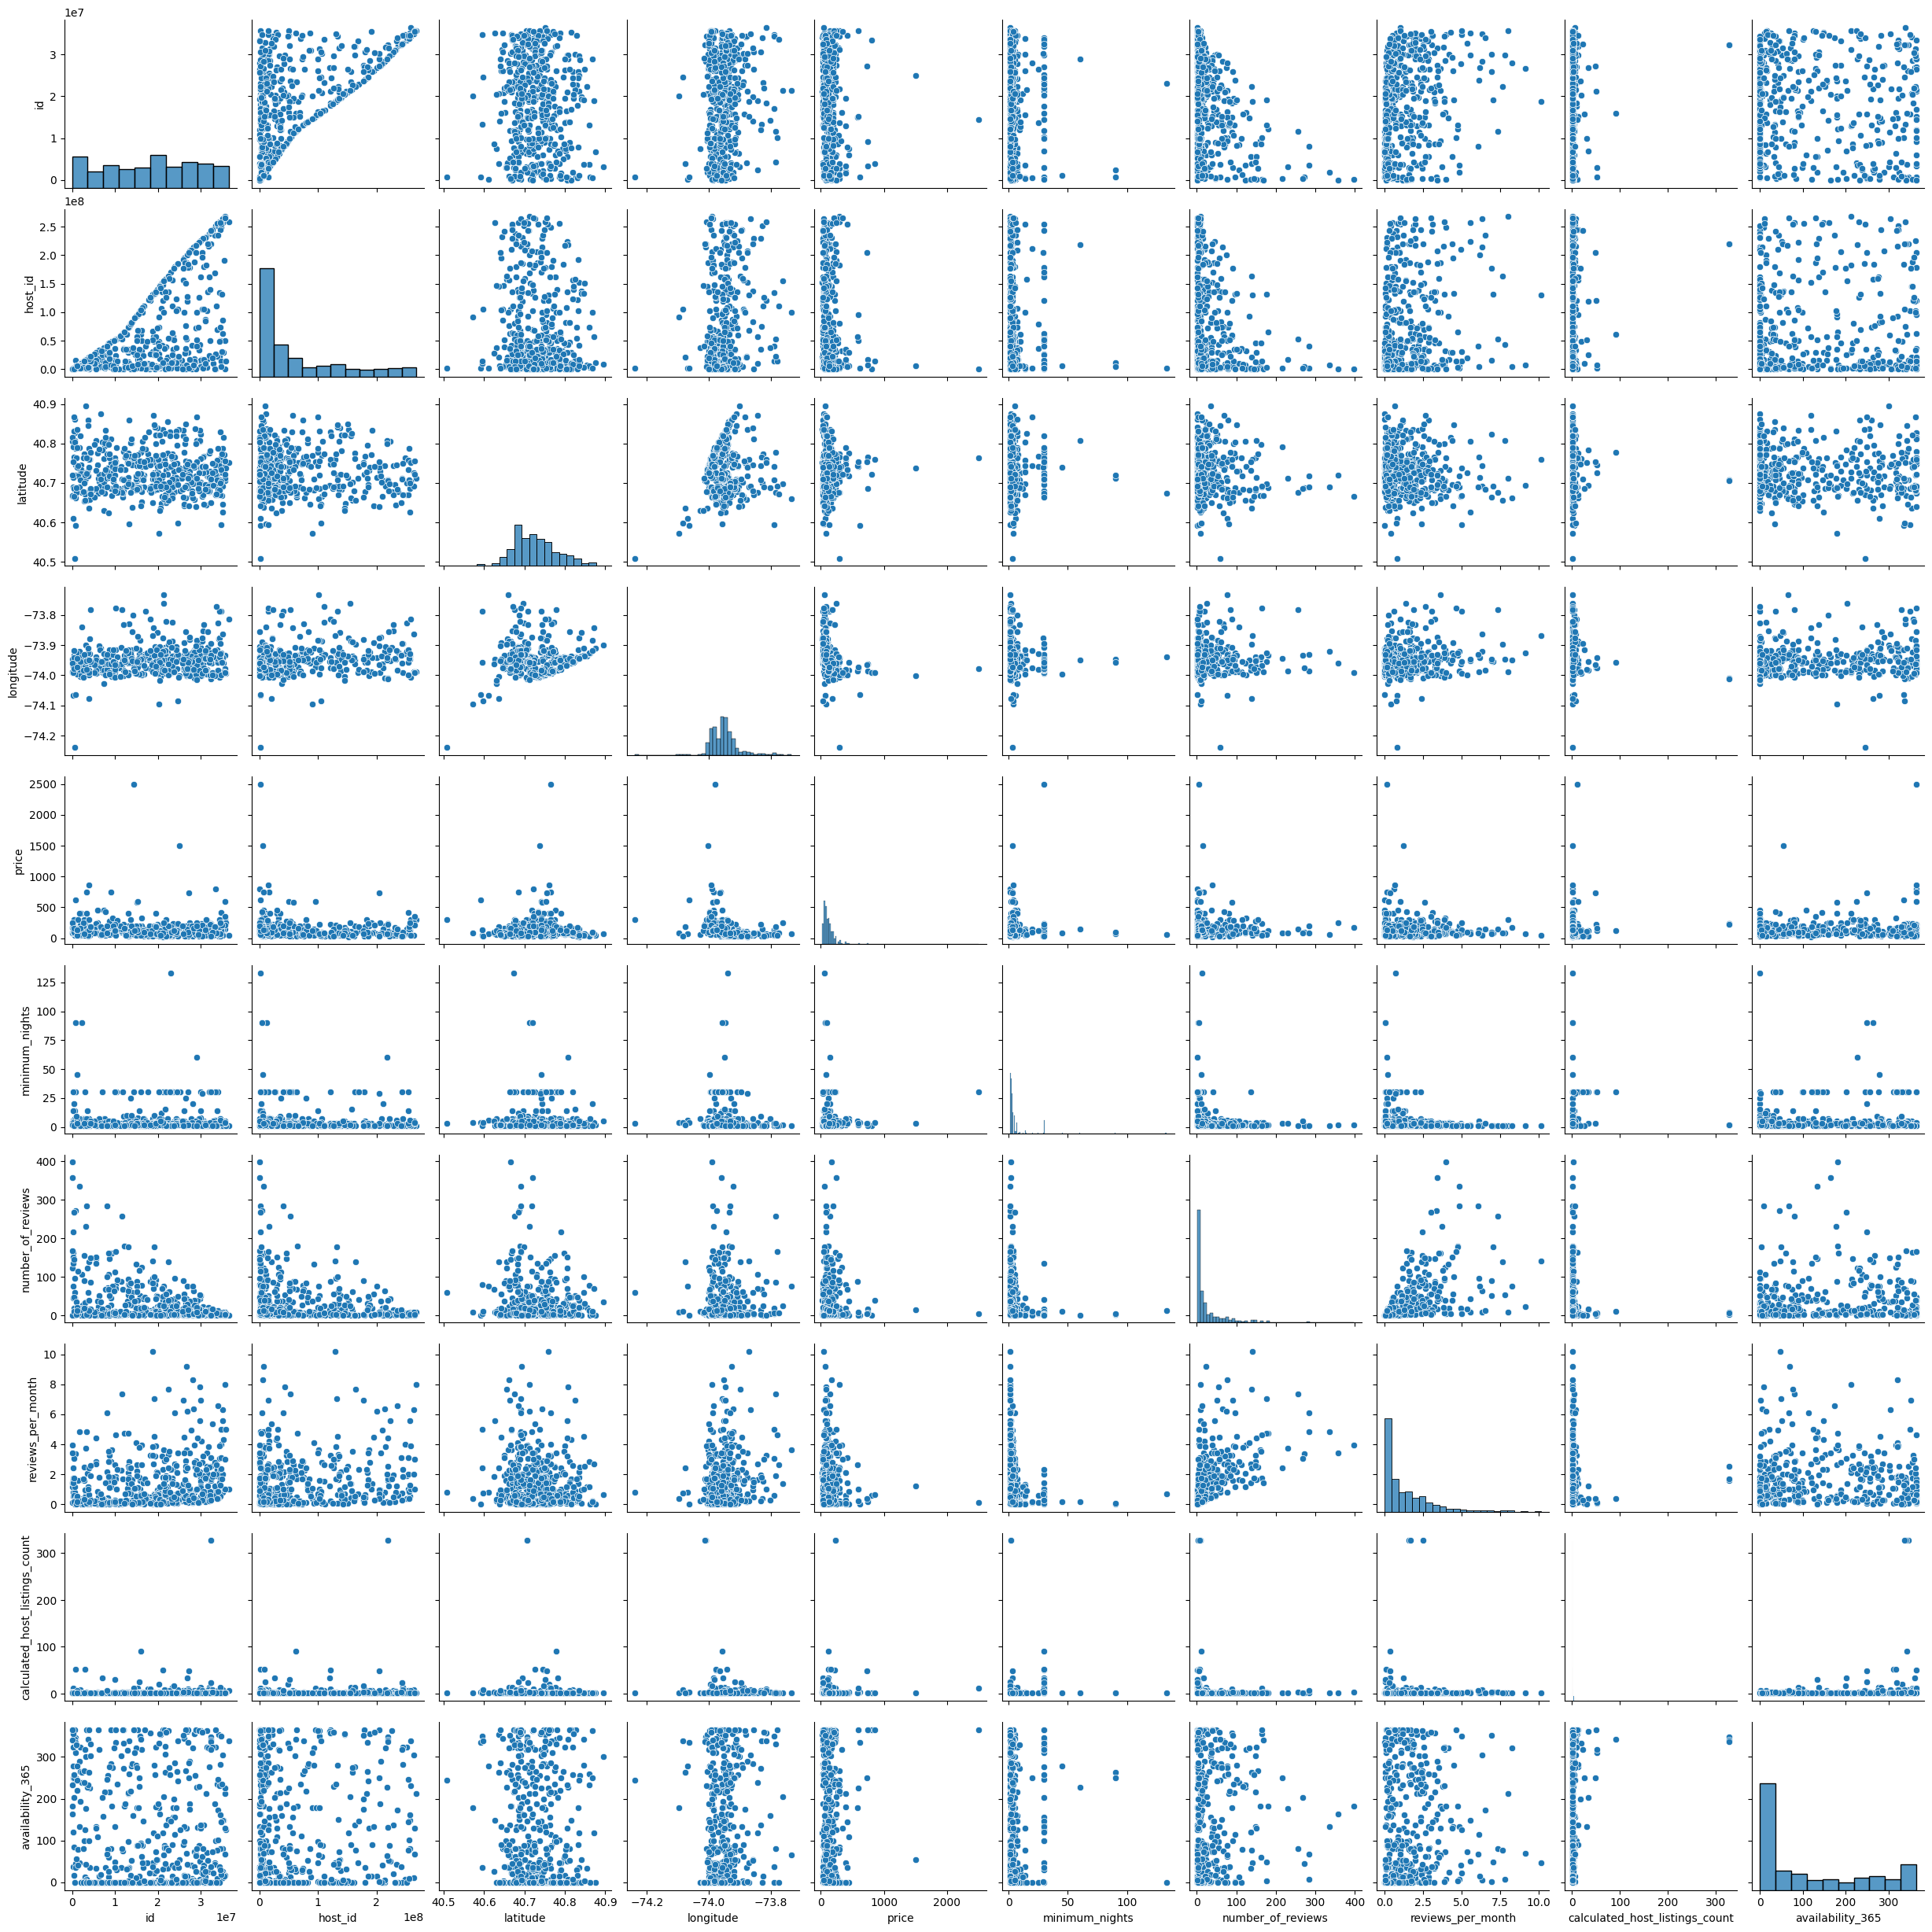

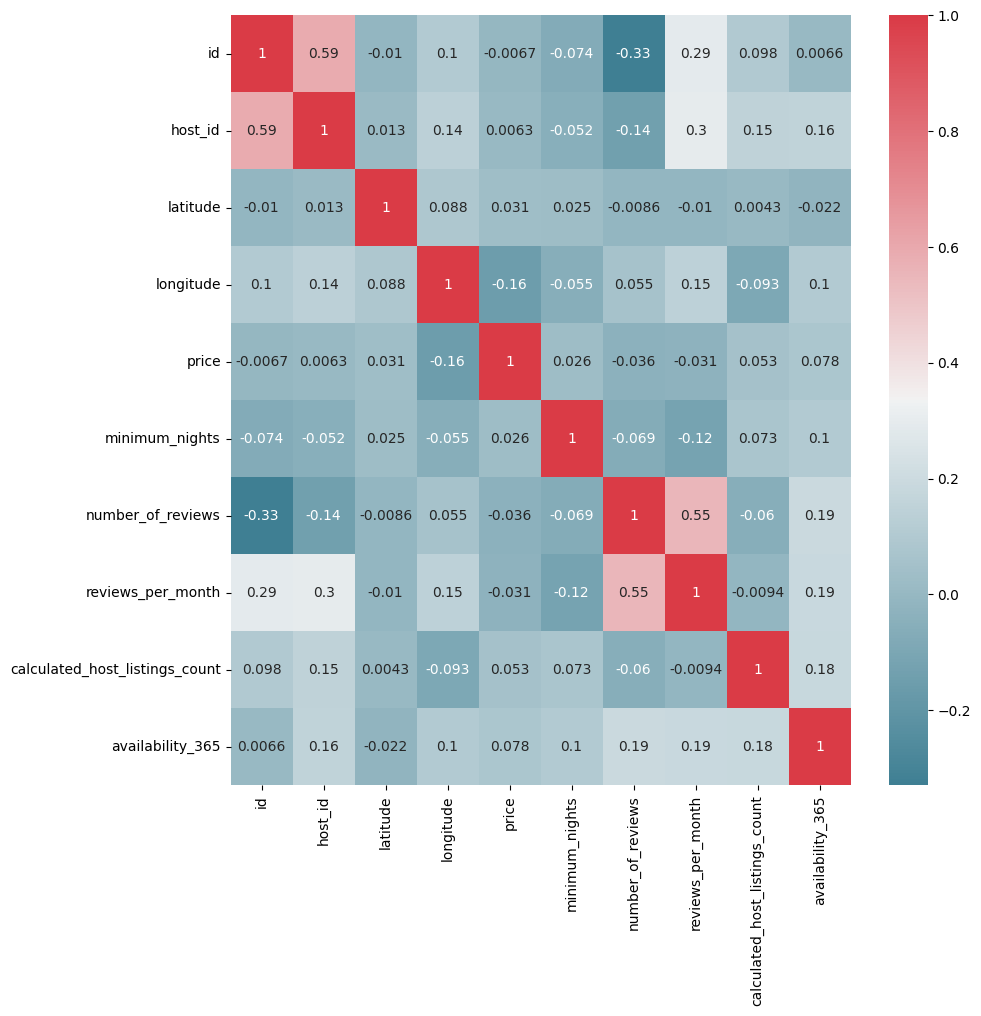

In [7]:
sns.pairplot(data.sample(500))

numeric_features = data.select_dtypes(include=[numpy.number])
corr = numeric_features.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap=cmap, annot=True)    # Display the correlation matrix as a heatmap
plt.show()

The tensorflow 2 Machine Learning Approaches

In [8]:
# prompt: implement a class LinearModel that used tf.keras for Linear Regression using 2 layers

#import tensorflow as tf

class LinearModel:
    def __init__(self, input_shape):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape, )),
            tf.keras.layers.Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def train(self, X_train, y_train, epochs=10, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, X_test, y_test):
        loss, mae = self.model.evaluate(X_test, y_test, verbose=0)
        print(f"Mean Absolute Error: {mae}")
        return mae

    def predict(self, X):
        return self.model.predict(X)


Train the model and evaluate


In [9]:
# prompt: Use the class LinearModel to train and evaluate the model

# Assuming X_train, X_test, y_train, y_test are defined as in the provided code.
# Input dimension should match the number of features in X_train.

# prompt: Use the class LinearModel to train and evaluate the model

# Assuming X_train, X_test, y_train, y_test are defined as in the provided code.
# Input dimension should match the number of features in X_train.

model = LinearModel(input_shape=X_train.shape[1]) # Pass the input shape to the constructor
model.train(X_train, y_train, epochs=10) # You can adjust epochs and batch size
mae = model.evaluate(X_test, y_test)

Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 39652.4492 - mae: 105.8617
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 41150.6641 - mae: 86.2694
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 38505.5469 - mae: 70.0352
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23279.9805 - mae: 60.6707
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 36317.3438 - mae: 64.0382
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 27205.0625 - mae: 61.0623
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 38142.9141 - mae: 64.2283
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 35478.3555 - mae: 62.6275
Epoch 9/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 37831.2109 - mae: 62.1506
Epoch 10/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 28493.3203 - mae: 60.8865
Mean Absolute Error: 63.10857391357422
